In [1]:
import pandas as pd
import re
import os
import importlib
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

To do
- [ ] segment all of this by model -> run the whole process separately by creating separate dfs per model
- [ ] aggregate multiple runs correctly: identify unique configs, then take mean across all configs, plot mean and each version of the config (but visually distinct), and plot scatter plot, where the mean is c of all results metrics for tha

# Data Loading & Cleaning

In [2]:
csv_path = "results/controlled_results_18_04.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ All rows have consistent 'total_generated_tokens' = 16384
----------------------------------------------------------------------------------------------------
⚠️ FLOPs values are NOT constant: [1.6949971e+13 0.0000000e+00]
Original distribution:
flops
0.000000e+00    185
1.694997e+13    349
Name: count, dtype: int64
- Dominant FLOPs value: 16949970993152.0
- Affected rows count: 185
- Affected row indices: [329, 330, 331, 342, 343, 345, 346, 347, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 459, 460, 461, 462, 46

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:574: UserWarning: ⚠️ FLOPs values are NOT constant: [1.6949971e+13 0.0000000e+00]
  verify_flops(df)


In [3]:
df['flops'] = 1.694997e+13
df['flops_per_token'] = df['flops'] / df['total_generated_tokens']

# Exploratory Data Analysis (EDA)

📊 Plotting histogram...


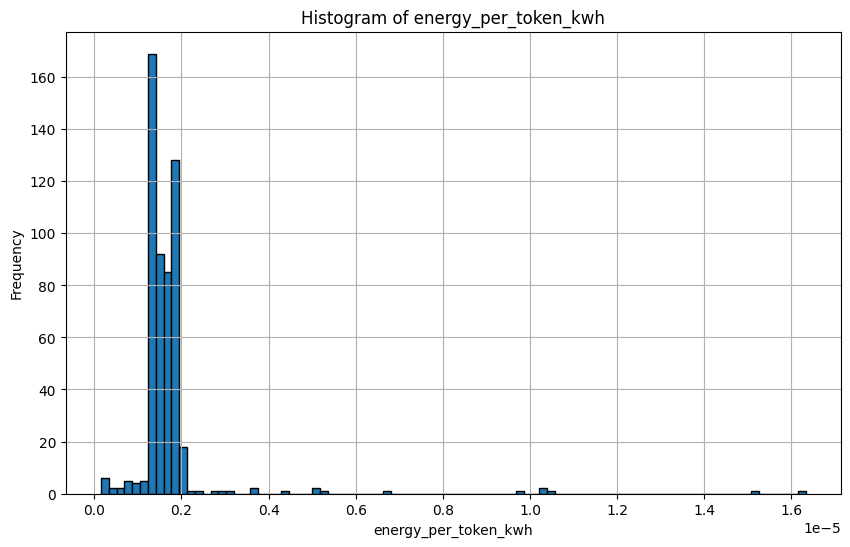

📦 Plotting boxplot...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:28: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  plt.boxplot(data[column].dropna(), vert=False)


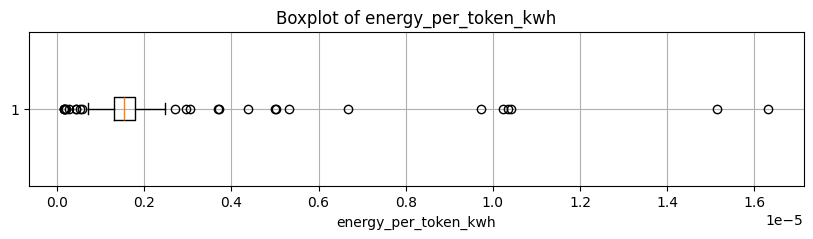

🔬 Scatter: Energy vs FLOPs...


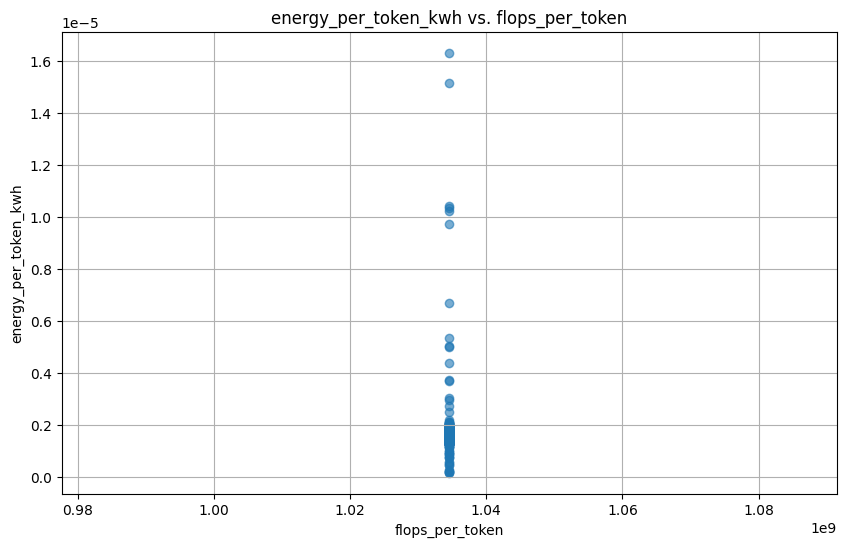

📈 Scatter: Divergence vs Batch Size...


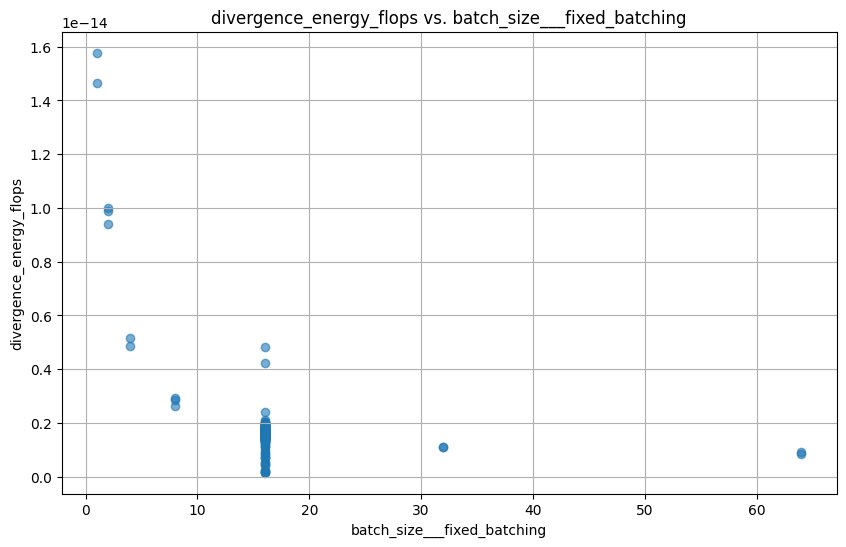

🔗 Correlation matrix...


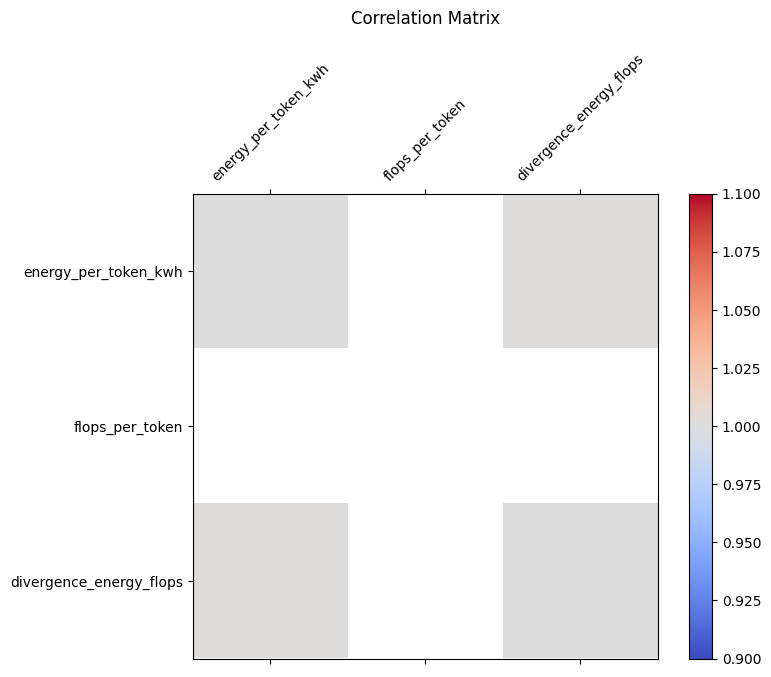

In [4]:
from scripts.b_exploratory_data_analysis import (
    plot_histogram,
    plot_boxplot,
    plot_scatter,
    plot_divergence,
    plot_correlation_matrix,
    plot_all_diagnostics
)

plot_all_diagnostics(df)

To do: 
- [ ] crop outliers temporarily -> look at closer grouped in more detail
- [ ] examine the divergence plot more

# Controlled Experiment Visualisation

NB: THE STD ERROR BAR EXTENDS BEYOND THE RAW OBSERVATIONS????

ADD LEGENDS TO ALL OF THEM!

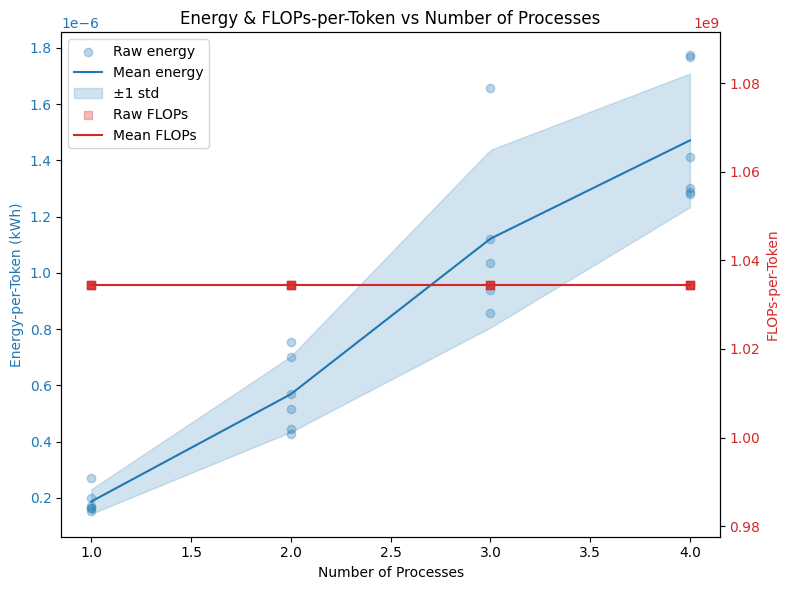

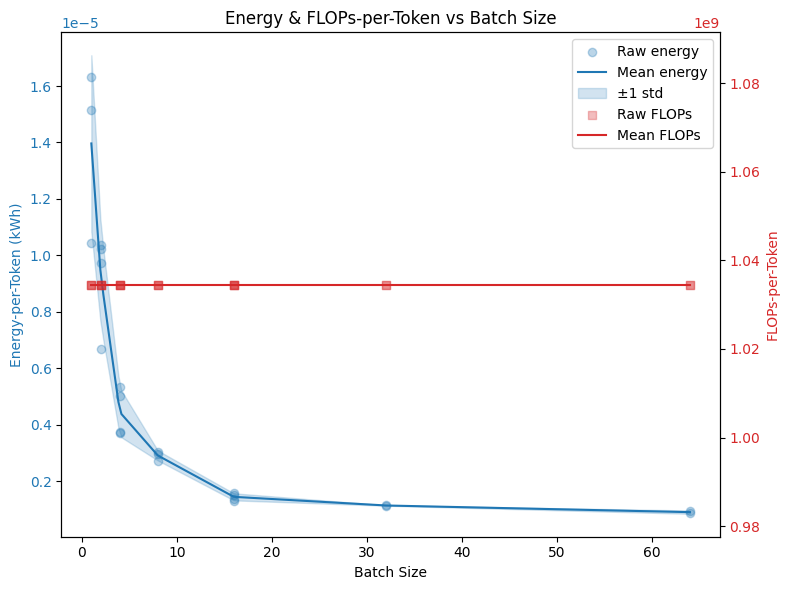

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  energy_stats = df.groupby('mode').agg(
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flops_stats = df.groupby('mode').agg(


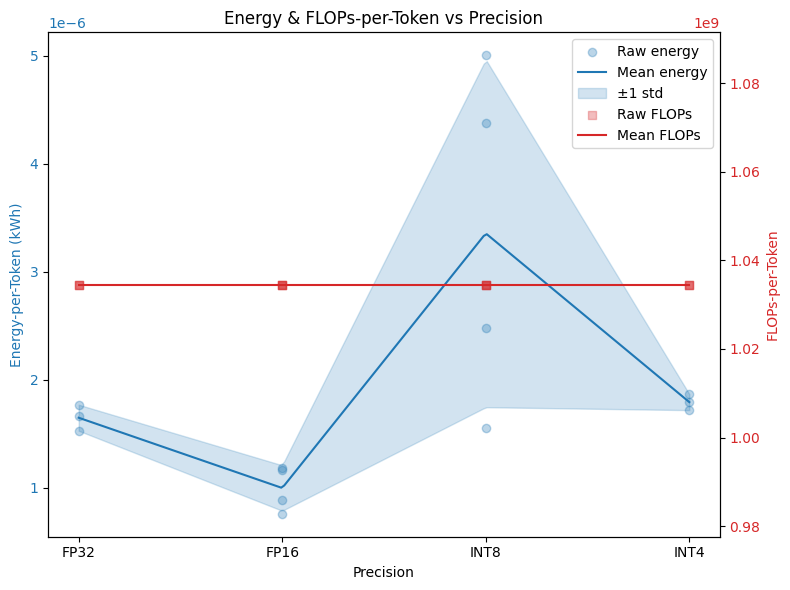

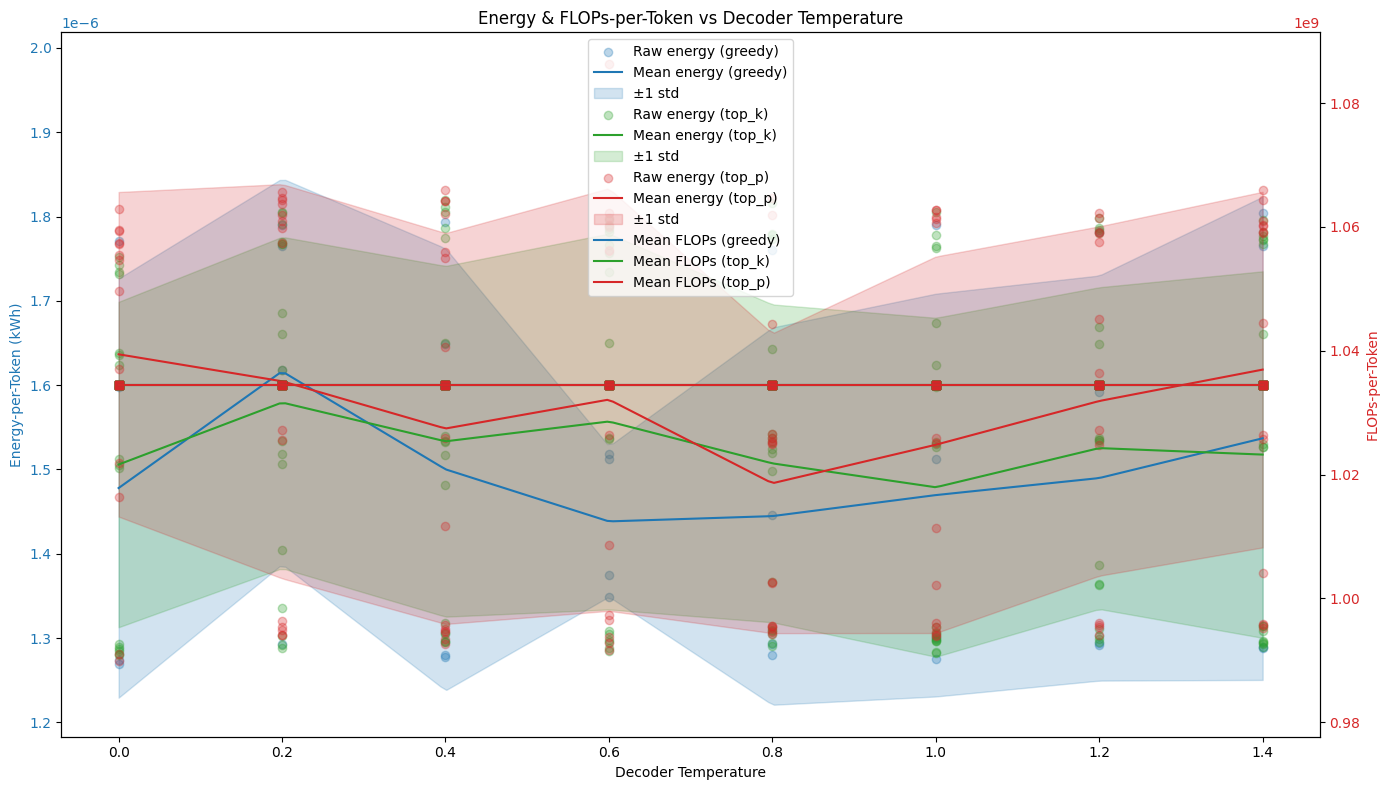

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


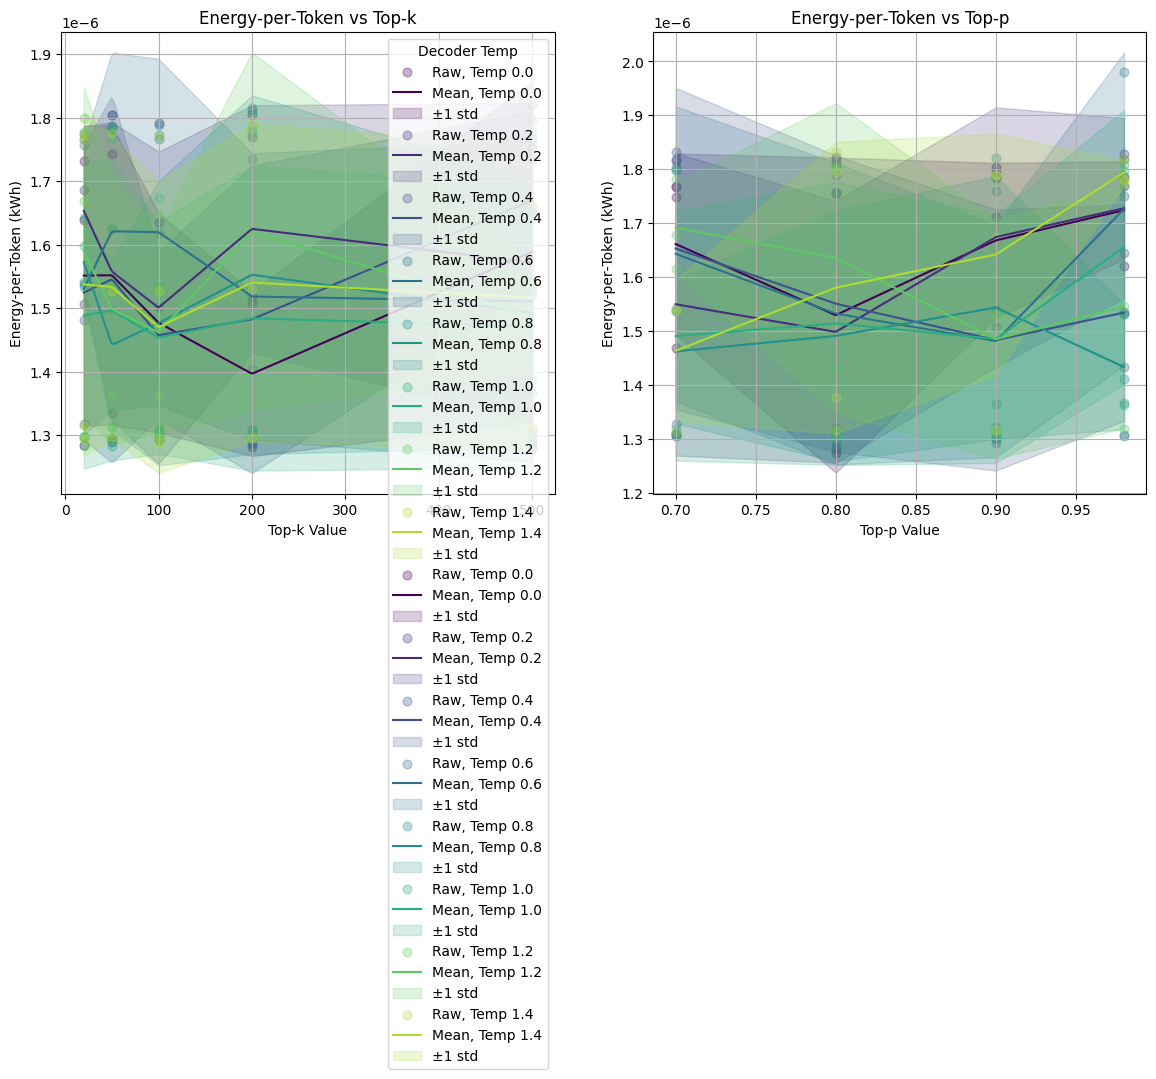

Observations per class:
  No simulation total:     3
  In Latency (constant):   17
  In Latency (bursty):     174


/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is depr

NameError: name 'cm' is not defined

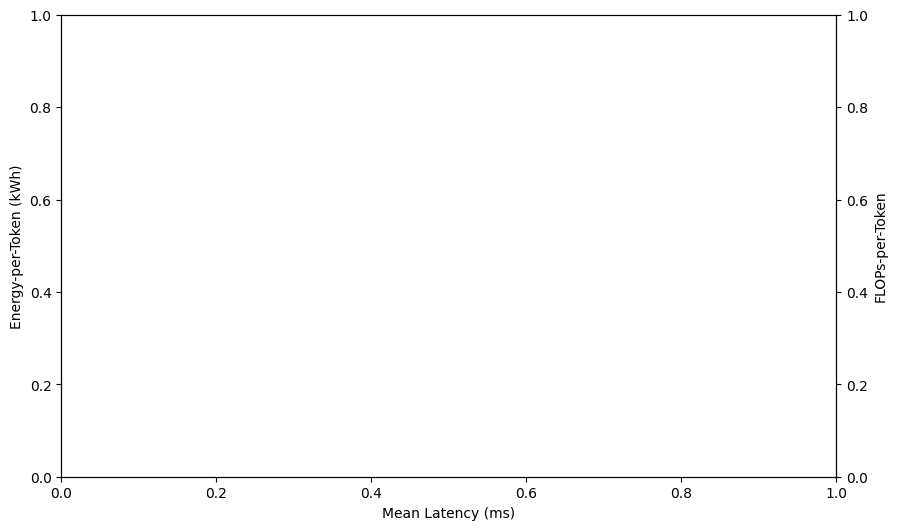

In [5]:
import numpy as np

import importlib
import scripts.c_controlled_exp_visualisations as viz
importlib.reload(viz)

from scripts.c_controlled_exp_visualisations import (
    plot_num_processes,
    plot_batching,
    plot_precision,
    plot_decoder_temperature,
    plot_decoder_topk_top_p,
    plot_latency,
    plot_all_vizs,
)

configs = ['num_processes', 'batching','precis', 'decoding', 'latency']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}


plot_all_vizs(dfs)


/var/folders/9b/zwzkyxhs7h7759872hzp3mz80000gn/T/ipykernel_17044/1405489729.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', len(sizes)+1)


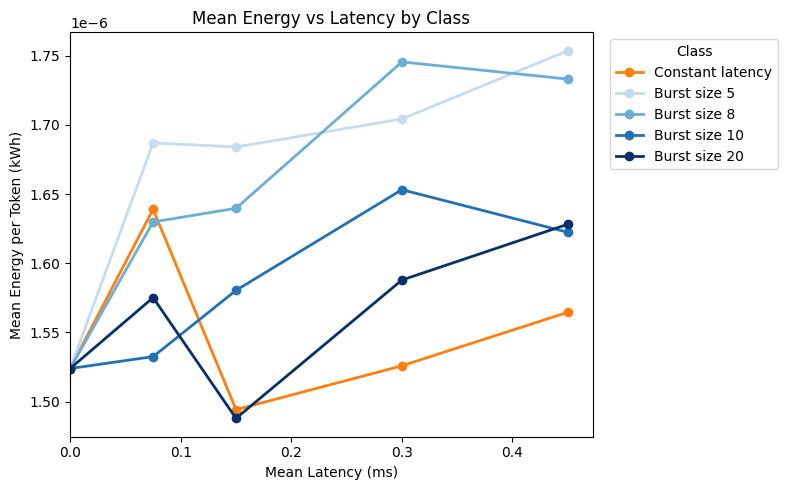

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

def add_latency_numeric(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['latency_numeric'] = df.apply(
        lambda r: 0.0
            if not r['latency_simulation_simulate']
            else (r['latency_simulation_delay_min'] +
                  r['latency_simulation_delay_max'])/2,
        axis=1
    )
    return df

def classify_by_burst_size_and_constant(df: pd.DataFrame):
    """
    Returns (df2, sizes), where df2 has new boolean columns:
      - class_const
      - class_burst_<size>  for each unique burst size
    and every column is OR’ed with the zero‑latency origin.
    """
    df = add_latency_numeric(df.copy())
    origin = df['latency_numeric'] == 0.0

    # 1) constant = simulate on & not burst, OR origin
    df['class_const'] = (
        (df['latency_simulation_simulate'] &
         ~df['latency_simulation_simulate_burst'])
        | origin
    )

    # 2) one column per burst size
    burst_rows = df['latency_simulation_simulate_burst']
    sizes = sorted(df.loc[burst_rows, 'latency_simulation_burst_size'].unique())
    for sz in sizes:
        col = f'class_burst_{sz}'
        df[col] = (
            (df['latency_simulation_simulate_burst'] &
             (df['latency_simulation_burst_size'] == sz))
            | origin
        )

    return df, sizes

def plot_mean_energy_by_class(df: pd.DataFrame, sizes: list):
    """
    Plots mean energy_per_token_kwh vs latency_numeric for:
      - Constant latency (orange)
      - Each burst_size (blue ramp)
    """
    # Color map
    cmap = cm.get_cmap('Blues', len(sizes)+1)
    colors = {'class_const': 'tab:orange'}
    for i, sz in enumerate(sizes, start=1):
        colors[f'class_burst_{sz}'] = cmap(i)

    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_xlabel("Mean Latency (ms)")
    ax.set_ylabel("Mean Energy per Token (kWh)")
    ax.set_title("Mean Energy vs Latency by Class")

    # Plot constant
    const_series = (
        df[df['class_const']]
          .groupby('latency_numeric')['energy_per_token_kwh']
          .mean()
    )
    ax.plot(const_series.index,
            const_series.values,
            label='Constant latency',
            color=colors['class_const'],
            marker='o', linewidth=2)

    # Plot each burst‐size
    for sz in sizes:
        col = f'class_burst_{sz}'
        series = (
            df[df[col]]
              .groupby('latency_numeric')['energy_per_token_kwh']
              .mean()
        )
        ax.plot(series.index,
                series.values,
                label=f'Burst size {sz}',
                color=colors[col],
                marker='o', linewidth=2)

    ax.set_xlim(left=0)
    ax.legend(title='Class', bbox_to_anchor=(1.02,1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Usage:
df0 = dfs['latency']                    # your raw DataFrame
df1, burst_sizes = classify_by_burst_size_and_constant(df0)
plot_mean_energy_by_class(df1, burst_sizes)


/var/folders/9b/zwzkyxhs7h7759872hzp3mz80000gn/T/ipykernel_17044/3079890092.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', len(intervals) + 1)


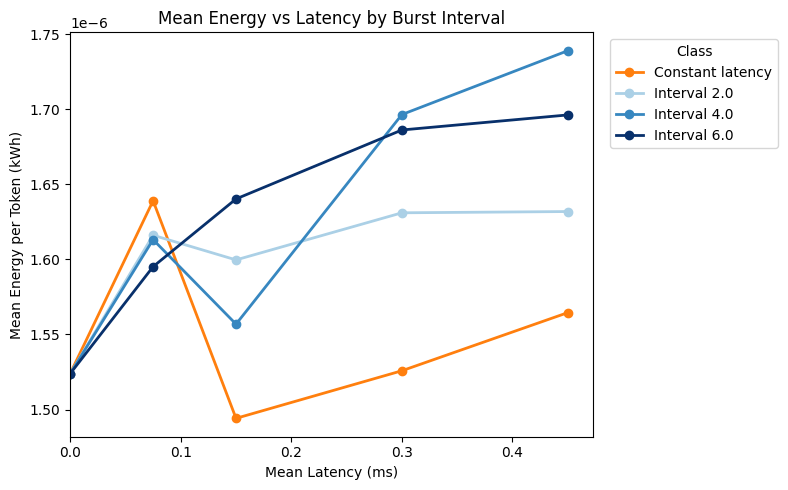

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

def add_latency_numeric(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['latency_numeric'] = df.apply(
        lambda r: 0.0
            if not r['latency_simulation_simulate']
            else (r['latency_simulation_delay_min'] +
                  r['latency_simulation_delay_max']) / 2,
        axis=1
    )
    return df

def classify_by_burst_interval_and_constant(df: pd.DataFrame):
    """
    Returns (df2, intervals), where df2 has new boolean columns:
      - class_const
      - class_interval_<interval> for each unique burst interval
    and every column is OR’ed with the zero‑latency origin.
    """
    df = add_latency_numeric(df.copy())
    origin = df['latency_numeric'] == 0.0

    # Constant-latency: simulate on & not burst, OR origin
    df['class_const'] = (
        (df['latency_simulation_simulate'] &
         ~df['latency_simulation_simulate_burst'])
        | origin
    )

    # Discover unique burst intervals
    burst_rows = df['latency_simulation_simulate_burst']
    intervals = sorted(df.loc[burst_rows, 'latency_simulation_burst_interval'].unique())

    # Create one boolean column per interval
    interval_cols = []
    for interval in intervals:
        col = f'class_interval_{interval}'
        df[col] = (
            (df['latency_simulation_simulate_burst'] &
             (df['latency_simulation_burst_interval'] == interval))
            | origin
        )
        interval_cols.append(col)

    return df, intervals

def plot_mean_energy_by_interval(df: pd.DataFrame, intervals: list):
    """
    Plots mean energy_per_token_kwh vs latency_numeric for:
      - Constant latency (orange)
      - Each burst interval (blue ramp)
    """
    cmap = cm.get_cmap('Blues', len(intervals) + 1)
    colors = {'class_const': 'tab:orange'}
    for i, interval in enumerate(intervals, start=1):
        colors[f'class_interval_{interval}'] = cmap(i)

    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_xlabel("Mean Latency (ms)")
    ax.set_ylabel("Mean Energy per Token (kWh)")
    ax.set_title("Mean Energy vs Latency by Burst Interval")

    # Plot constant
    const_series = (
        df[df['class_const']]
          .groupby('latency_numeric')['energy_per_token_kwh']
          .mean()
    )
    ax.plot(const_series.index,
            const_series.values,
            label='Constant latency',
            color=colors['class_const'],
            marker='o', linewidth=2)

    # Plot each burst interval
    for interval in intervals:
        col = f'class_interval_{interval}'
        series = (
            df[df[col]]
              .groupby('latency_numeric')['energy_per_token_kwh']
              .mean()
        )
        ax.plot(series.index,
                series.values,
                label=f'Interval {interval}',
                color=colors[col],
                marker='o', linewidth=2)

    ax.set_xlim(left=0)
    ax.legend(title='Class', bbox_to_anchor=(1.02,1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Usage example:
df0 = dfs['latency']
df1, intervals = classify_by_burst_interval_and_constant(df0)
plot_mean_energy_by_interval(df1, intervals)


In [8]:
from matplotlib import cm

def classify_latency(df: pd.DataFrame) -> pd.DataFrame:
    """
    Given a DataFrame with these columns:
      - latency_simulation_simulate (bool)
      - latency_simulation_simulate_burst (bool)
      - latency_simulation_delay_min (float)
      - latency_simulation_delay_max (float)
      - flops_per_token
      - energy_per_token_kwh
    Returns a new DataFrame with boolean columns:
      - latency_constant
      - latency_bursty
      - one column per unique burst-range tuple (min,max)
    plus flops_per_token and energy_per_token_kwh.
    """
    df = df.copy()
    
    # Base flags
    bursty = df['latency_simulation_simulate_burst'].fillna(False)
    constant = ~bursty
    no_sim = ~df['latency_simulation_simulate'].fillna(False)

    # Combined columns
    df['latency_bursty'] = bursty | no_sim
    df['latency_constant'] = constant | no_sim

    # Identify unique burst ranges
    burst_ranges = (
        df[bursty][['latency_simulation_delay_min', 'latency_simulation_delay_max']]
        .drop_duplicates()
        .apply(tuple, axis=1)
        .tolist()
    )

    # Create one boolean column per range
    for dmin, dmax in burst_ranges:
        col_name = f"burst_{dmin}_{dmax}"
        df[col_name] = (
            df['latency_simulation_simulate_burst'] &
            (df['latency_simulation_delay_min'] == dmin) &
            (df['latency_simulation_delay_max'] == dmax)
        )

    keep_cols = [
        'flops_per_token',
        'energy_per_token_kwh',
        'latency_simulation_simulate',
        'latency_simulation_delay_min',
        'latency_simulation_delay_max',
    ]
    new_latency_cols = [
        'latency_numeric',
        'latency_constant', 
        'latency_bursty'
    ]
    burst_cols = [f"burst_{dmin}_{dmax}" for dmin, dmax in burst_ranges]
    
    result = df.loc[:, keep_cols + new_latency_cols + burst_cols]
    
    return result

def add_latency_numeric(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds 'latency_numeric' column to a DataFrame:
    - 0.0 if latency_simulation_simulate is False
    - else mean of latency_simulation_delay_min and _max
    """
    df = df.copy()
    df['latency_numeric'] = df.apply(
        lambda r: 0.0
            if not r.get('latency_simulation_simulate', False)
            else (float(r['latency_simulation_delay_min']) +
                float(r['latency_simulation_delay_max'])) / 2,
        axis=1
    )
    return df


df0 = dfs['latency']
df1 = add_latency_numeric(df0)  
df2 = classify_latency(df1)      

print("Burst columns and their row‐counts:")
for c in df2.columns:
    if c.startswith("burst_"):
        print(f"  {c:15s} → {df2[c].sum()} rows")



Burst columns and their row‐counts:
  burst_0.1_0.2   → 44 rows
  burst_0.05_0.1  → 43 rows
  burst_0.4_0.5   → 43 rows
  burst_0.2_0.4   → 44 rows


/var/folders/9b/zwzkyxhs7h7759872hzp3mz80000gn/T/ipykernel_17044/1669402687.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(burst_cols) + 1)


▶️  Starting debug plot...
Columns available: ['flops_per_token', 'energy_per_token_kwh', 'latency_simulation_simulate', 'latency_simulation_delay_min', 'latency_simulation_delay_max', 'latency_numeric', 'latency_constant', 'latency_bursty', 'burst_0.1_0.2', 'burst_0.05_0.1', 'burst_0.4_0.5', 'burst_0.2_0.4']
Found 4 burst_* columns: ['burst_0.05_0.1', 'burst_0.1_0.2', 'burst_0.2_0.4', 'burst_0.4_0.5']
  → burst_0.05_0.1: count=43, latency_numeric values=[0.075]
  → burst_0.1_0.2: count=44, latency_numeric values=[0.15]
  → burst_0.2_0.4: count=44, latency_numeric values=[0.3]
  → burst_0.4_0.5: count=43, latency_numeric values=[0.45]
latency_constant: count=17
Color mapping: {'latency_constant': 'tab:orange', 'burst_0.05_0.1': (np.float64(0.7764705882352941), np.float64(0.8588235294117647), np.float64(0.9372549019607843), np.float64(1.0)), 'burst_0.1_0.2': (np.float64(0.4196078431372549), np.float64(0.6823529411764706), np.float64(0.8392156862745098), np.float64(1.0)), 'burst_0.2_0.4'

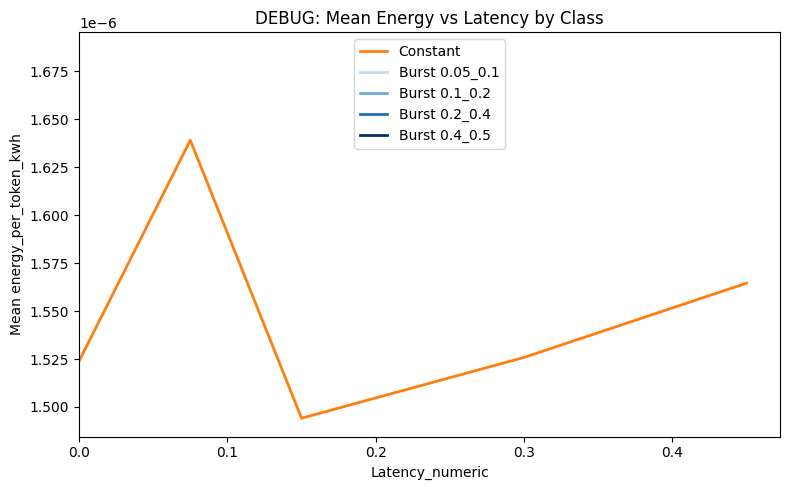

✅ Debug plot complete.


In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm

dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}
df

def plot_mean_energy_by_class_debug(df: pd.DataFrame):
    """
    Like plot_mean_energy_by_class, but with debug prints at every stage.
    """
    print("▶️  Starting debug plot...")
    
    # 1) List all columns -- make sure your burst_ and latency_ cols exist
    print("Columns available:", df.columns.tolist())
    
    # 2) Identify burst_* columns
    burst_cols = sorted(
        [c for c in df.columns if c.startswith("burst_")],
        key=lambda c: tuple(map(float, c.split("_")[1:]))
    )
    print(f"Found {len(burst_cols)} burst_* columns: {burst_cols}")
    
    # 3) Check counts in each burst_ column
    for c in burst_cols:
        cnt = int(df[c].sum())
        unique_lat = df.loc[df[c], 'latency_numeric'].unique()
        print(f"  → {c}: count={cnt}, latency_numeric values={unique_lat}")
    
    # 4) Check constant‐latency counts
    if "latency_constant" in df.columns:
        const_cnt = int(df["latency_constant"].sum())
        print(f"latency_constant: count={const_cnt}")
    else:
        print("⚠️  No 'latency_constant' column!")
    
    # 5) Build color map
    cmap = cm.get_cmap("Blues", len(burst_cols) + 1)
    colors = {"latency_constant": "tab:orange"}
    for i, col in enumerate(burst_cols, start=1):
        colors[col] = cmap(i)
    print("Color mapping:", colors)
    
    # 6) Prepare plot
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_title("DEBUG: Mean Energy vs Latency by Class")
    ax.set_xlabel("Latency_numeric")
    ax.set_ylabel("Mean energy_per_token_kwh")
    
    # 7) Constant‐latency series
    if "latency_constant" in df.columns:
        const_series = (
            df[df["latency_constant"]]
              .groupby("latency_numeric")["energy_per_token_kwh"]
              .mean()
        )
        print("Constant series:\n", const_series)
        if not const_series.empty:
            ax.plot(const_series.index,
                    const_series.values,
                    label="Constant",
                    color=colors["latency_constant"],
                    linewidth=2)
        else:
            print("⚠️  Constant series is empty!")
    
    # 8) Each burst subclass
    for col in burst_cols:
        print(f"-- handling {col} --")
        mask = df[col]
        print(f"   mask sum: {int(mask.sum())}")
        series = (
            df[mask]
              .groupby("latency_numeric")["energy_per_token_kwh"]
              .mean()
        )
        print(f"   series for {col}:\n{series}")
        if series.empty:
            print(f"   ⚠️  Series for {col} is empty, skipping plot.")
            continue
        label = col.replace("burst_", "Burst ")
        ax.plot(series.index,
                series.values,
                label=label,
                color=colors[col],
                linewidth=2)
    
    # 9) Finalize
    ax.legend(loc="best")
    ax.set_xlim(left=0)
    plt.tight_layout()
    plt.show()
    print("✅ Debug plot complete.")
    
plot_mean_energy_by_class_debug(df2)

to do:
- [ ] don't treat no simulation and simulation as categorically distinct, rather they are on a continuous number line, and the plots should reflect that
- [ ] get FLOPs to print just once, and the legend to only be taken from one axis 
- PRINT WITH NORMALISED AXIS!!!! - Plot the values as a percent of the mean to visualise their relative spread

TO DO: WORK OUT % OF TOTAL ENERGY CONSUMPTION / VARIANCE THAT CAN BE EXPLAINED BY TOTAL CONFIGS CHANGES VS BASELINE THAT IS MODEL DETERMINED

# Modeling


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.388
Model:                              OLS   Adj. R-squared:                  0.276
Method:                   Least Squares   F-statistic:                     3.481
Date:                  Sat, 19 Apr 2025   Prob (F-statistic):             0.0674
Time:                          03:27:31   Log-Likelihood:                 174.55
No. Observations:                    14   AIC:                            -343.1
Df Residuals:                        11   BIC:                            -341.2
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


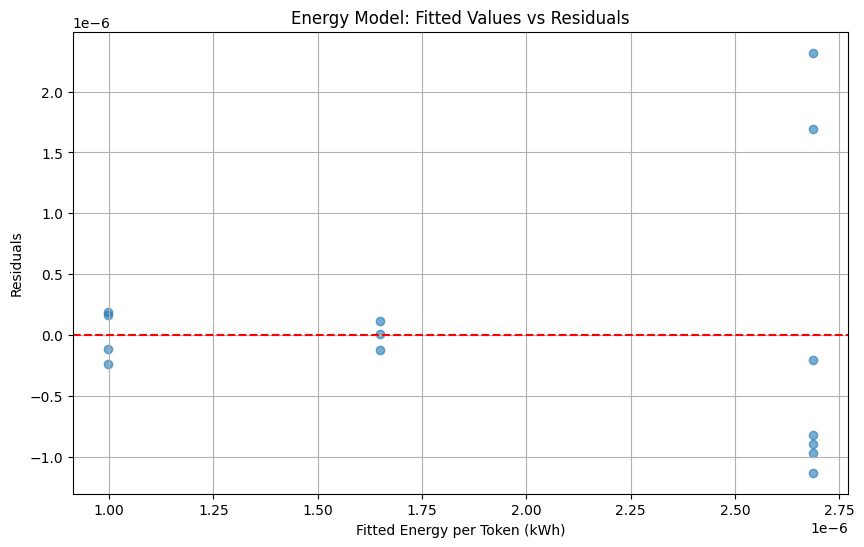


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.388
Model:                              OLS   Adj. R-squared:                  0.276
Method:                   Least Squares   F-statistic:                     3.481
Date:                  Sat, 19 Apr 2025   Prob (F-statistic):             0.0674
Time:                          03:27:31   Log-Likelihood:                 174.55
No. Observations:                    14   AIC:                            -343.1
Df Residuals:                        11   BIC:                            -341.2
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


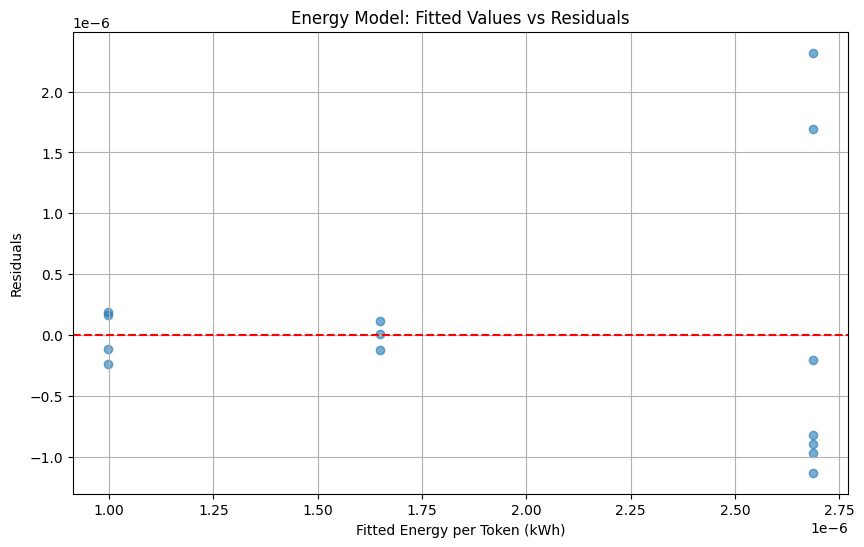

In [10]:
from scripts.d_base_regression import run_full_regression_analysis, preprocess_data

df = preprocess_data(df)

# With default predictors
run_full_regression_analysis(df)

# With custom predictors
custom_predictors = ["batch_size_numeric", "C(fp_precision)", "C(quantization)"]
run_full_regression_analysis(df, predictors=custom_predictors)


In [11]:
%run scripts/d_mixed_effects_model.py

/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


Exception: File `'scripts/d_mixed_effects_model.py'` not found.

In [ ]:
df['energy_per_token_kwh'].max() -  df['energy_per_token_kwh'].min() 

To do
- [ ] identify groupings:
   - [ ] use model (even though currently only one model)
   - [ ] use config_name and date_time
   - [ ] use decoder configs
   - [ ] latency configs 